<a name="intro"></a>

# Notebook 1: Análisis del modelo de Redes Neuronales Artificiales (ANN)

## Introducción

Bienvenido al notebook de análisis del modelo de Redes Neuronales Artificiales (ANN). En este notebook, exploraremos la aplicación de ANN para modelar el comportamiento de un sistema de bomba de agua. ANN es un modelo computacional inspirado en la estructura y aspectos funcionales de las redes neuronales biológicas. Es capaz de capturar patrones y relaciones complejas dentro de los datos a través de una serie de elementos de procesamiento interconectados, conocidos como neuronas.

Comenzaremos cargando el conjunto de datos, que contiene diversas medidas y métricas de rendimiento de la bomba de agua. Nuestro objetivo es construir un modelo de ANN que pueda predecir con precisión el comportamiento de la bomba bajo diferentes condiciones. Procesaremos los datos, diseñaremos la arquitectura de la red neuronal, entrenaremos el modelo y evaluaremos su rendimiento. Los conocimientos obtenidos de este modelo contribuirán a una comprensión integral en comparación con otros enfoques de modelado en cuadernos posteriores; todo ello resumido en el Notebook 6.

<a name="indice"></a>
# Índice

*   [Introducción](#intro)

*   [Libraries](#librerias)

*   [Preparación de los datos](#readingdata)

  - [Carga del conjunto de datos](#cargardatos)
  - [Conjuntos de entrenamiento y prueba](#limpiardatos)  

*   [Modelo de ANN](#modeloredes)

  - [Definición del modelo](#definicionmodelos)
  - [Entrenamiento del modelo](#entrenamientomodelos)
  - [Evaluación del modelo](#evaluacionmodelos)
  - [Importancia de las variables (SHAP)](#importanciavariables)

*   [Guardando los resultados](#guardar)


<a name="librerias"></a>

## Librerias

[Keras](https://es.wikipedia.org/wiki/Keras) es una API de redes neuronales de alto nivel que puede ejecutarse sobre [Tensorflow](https://es.wikipedia.org/wiki/TensorFlow), lo que permite el prototipado fácil y rápido de modelos de aprendizaje profundo. TensorFlow, desarrollado por el equipo de Google Brain, es una plataforma de código abierto de extremo a extremo para el aprendizaje automático que proporciona un ecosistema integral de herramientas y bibliotecas para construir y desplegar aplicaciones impulsadas por el aprendizaje automático.

[Numpy](https://es.wikipedia.org/wiki/NumPy) es un paquete fundamental para la computación científica en Python, que proporciona soporte para matrices y arreglos multidimensionales de gran tamaño, junto con una colección de funciones matemáticas para operar eficientemente en estos arreglos.

[Pandas](https://es.wikipedia.org/wiki/Pandas_(software)) es una biblioteca que ofrece estructuras de datos y herramientas de análisis de datos de alto rendimiento y fáciles de usar para Python. Su estructura de datos principal es el DataFrame, que permite almacenar y manipular datos tabulares en filas de observaciones y columnas de variables.

[Matplotlib](https://es.wikipedia.org/wiki/Matplotlib) es una biblioteca de trazado de gráficos para Python y su extensión matemática numérica, NumPy. Proporciona una API orientada a objetos para incrustar gráficos en aplicaciones utilizando herramientas de interfaz gráfica de usuario de propósito general como Tkinter, wxPython, Qt o GTK.

El módulo "random" implementa generadores de números pseudoaleatorios para diversas distribuciones y es útil para tareas como la selección aleatoria de muestras y la elección de elementos aleatorios de un rango o colección.

[Scikit-learn](https://en.wikipedia.org/wiki/Scikit-learn) (Sklearn) es una biblioteca de aprendizaje automático para Python que proporciona herramientas simples y eficientes para la minería de datos y el análisis de datos. Cuenta con varios algoritmos de clasificación, regresión y agrupamiento.

[SHAP](https://shap.readthedocs.io/en/latest/index.html) (SHapley Additive exPlanations) es una biblioteca que explica la salida de los modelos de aprendizaje automático mediante el cálculo de la contribución de cada característica a la predicción.

Google Colab es un servicio en la nube gratuito basado en Jupyter Notebooks que admite GPU gratuitas e integra con Google Drive. Se utiliza para la educación e investigación en aprendizaje automático, proporcionando un entorno fácil de usar para escribir y ejecutar código Python, lo cual es especialmente beneficioso para proyectos colaborativos.

In [ ]:
# General libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Random numbers
import random

# ROC curves
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# other scikit-learn auxiliary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# SHAP
!pip install shap # This is not installed by default in Google Colab
                  # Needs to be installed each time the notebook is
                  # run and it takes about 30s to do so.
import shap

# Google Drive library
from google.colab import drive

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 2.9 MB/s eta 0:00:00


[(*volver al índice*)](#indice)

<a name="readingdata"></a>
# Preparado de datos

<a name="cargardatos"></a>
## Cargar el conjunto de datos

Cargamos los datos en memoria y comprobamos que todo funciona. Los datos ya están balanceados por el código anterior disponible en el Notebook 0.

La primera vez que te conectas el drive de Google te pide permiso para acceder y tienes que pinchar en aceptar dicho permiso.

In [ ]:
# Nombre del archivos con las X e Ys
X_FILE_NAME = "Datos_balanceados_X_6000.txt"
Y_FILE_NAME = "Datos_balanceados_Y_6000.txt"

# Nombre de los directorios con los ficheros
PROJECT_FOLDER = "/content/drive/My Drive/Colab Notebooks/"
DATA_FOLDER    = "/Resultados/Balanceo de datos/"

# Montar el disco de drive
drive.mount('/content/drive')

# Guardamos el ID de cada sensor; notice that ID 15 is not in the list
sensorNames = ["SENSOR_00", "SENSOR_01", "SENSOR_02", "SENSOR_03", "SENSOR_04",
               "SENSOR_05", "SENSOR_06", "SENSOR_07", "SENSOR_08", "SENSOR_09",
               "SENSOR_10", "SENSOR_11", "SENSOR_12", "SENSOR_13", "SENSOR_14",
               "SENSOR_16", "SENSOR_17", "SENSOR_18", "SENSOR_19", "SENSOR_20",
               "SENSOR_21", "SENSOR_22", "SENSOR_23", "SENSOR_24", "SENSOR_25",
               "SENSOR_26", "SENSOR_27", "SENSOR_28", "SENSOR_29", "SENSOR_30",
               "SENSOR_31", "SENSOR_32", "SENSOR_33", "SENSOR_34", "SENSOR_35",
               "SENSOR_36", "SENSOR_37", "SENSOR_38", "SENSOR_39", "SENSOR_40",
               "SENSOR_41", "SENSOR_42", "SENSOR_43", "SENSOR_44", "SENSOR_45",
               "SENSOR_46", "SENSOR_47", "SENSOR_48", "SENSOR_49", "SENSOR_50",
               "SENSOR_51"]

# Guardamos el significado de cada sensor
sensorProperties = ["Motor Casing Vibration", "Motor Frequency A",
                    "Motor Frequency B", "Motor Frequency C", "Motor Speed",
                    "Motor Current", "Motor Active Power",
                    "Motor Apparent Power", "Motor Reactive Power",
                    "Motor Shaft Power", "Motor Phase Current A",
                    "Motor Phase Current B", "Motor Phase Current C",
                    "Motor Coupling Vibration", "Motor Phase Voltage AB",
                    "Motor Phase Voltage BC", "Motor Phase Voltage CA",
                    "Pump Casing Vibration", "Pump Stage 1 Impeller Speed",
                    "Pump Stage 1 Impeller Speed", "Pump Stage 1 Impeller Speed",
                    "Pump Stage 1 Impeller Speed", "Pump Stage 1 Impeller Speed",
                    "Pump Stage 1 Impeller Speed", "Pump Stage 2 Impeller Speed",
                    "Pump Stage 2 Impeller Speed", "Pump Stage 2 Impeller Speed",
                    "Pump Stage 2 Impeller Speed", "Pump Stage 2 Impeller Speed",
                    "Pump Stage 2 Impeller Speed", "Pump Stage 2 Impeller Speed",
                    "Pump Stage 2 Impeller Speed", "Pump Stage 2 Impeller Speed",
                    "Pump Inlet Flow", "Pump Discharge Flow", "Pump UNKNOWN",
                    "Pump Lube Oil Overhead Reservoir Level",
                    "Pump Lube Oil Return Temp", "Pump Lube Oil Supply Temp",
                    "Pump Thrust Bearing Active Temp",
                    "Motor Non Drive End Radial Bearing Temp 1",
                    "Motor Non Drive End Radial Bearing Temp 2",
                    "Pump Thrust Bearing Inactive Temp",
                    "Pump Drive End Radial Bearing Temp 1",
                    "Pump non Drive End Radial Bearing Temp 1",
                    "Pump Non Drive End Radial Bearing Temp 2",
                    "Pump Drive End Radial Bearing Temp 2",
                    "Pump Inlet Pressure", "Pump Temp Unknown",
                    "Pump Discharge Pressure 1", "Pump Discharge Pressure 2"]

# Recordamos que eliminamos los datos de los sensores 15 y 50. Así que
# procedemos a eliminar también los nombres de estas listas
#
# Pero el sensor 15, NO ESTÁ EN LA LISTA.
# Sólo quitamos el 50, que corresponde con la posición 49 (vaya lío)
del sensorProperties[49]
del sensorNames[49]

# Cárgamos el archivo en un dataframe
# NOTA: La columna para el sensor 15 está vacía, esto es correcto
data_x = pd.read_csv( PROJECT_FOLDER + DATA_FOLDER + X_FILE_NAME, sep = " ", header=None)
data_y = pd.read_csv( PROJECT_FOLDER + DATA_FOLDER + Y_FILE_NAME, sep = " ", header=None)
data_y = data_y.astype(int)

# Renombramos los nombres de las columnas para mayor claridad
data_x.columns = sensorNames
data_y.columns = ["Y"]

print("Cargado de datos concluido")


Mounted at /content/drive
Cargado de datos concluido


<a name="limpiardatos"></a>
## Conjunto de entramiento y test de datos

Dividimos el conjunto de los 6000 datos en entrenamiento y test con una proporción del 80%, de tal forma que el conjunto de entrenamiento tendrá unos 4800 datos y el de test alrededor de 1200.

In [ ]:
# Semilla aleatoria constante para reproducibilidad
RANDOM_SEED = 42

# Declaramos la proporción de datos que son para entrenar y para testear
TRAIN_PROPORTION = 0.8 # Esto significa el 80% de los datos para el conjunto
                       # de entrenamiento y el 20% para el conjunto test

# Separamos los datos en conjunto de entrenamiento y datos:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data_x, data_y, test_size = (1 - TRAIN_PROPORTION), random_state = RANDOM_SEED)

# Los convertimos de vuelta a dataframes
Xtrain = pd.DataFrame(Xtrain, columns=data_x.columns)
Xtest  = pd.DataFrame(Xtest,  columns=data_x.columns)
Ytrain = pd.DataFrame(Ytrain, columns=data_y.columns)
Ytest  = pd.DataFrame(Ytest,  columns=data_y.columns)

# Guardamos las dimensiones de la matrix de entrada X para luego
totalInputsRows    = Xtrain.shape[0]
totalInputsColumns = Xtrain.shape[1]

[(*volver al índice*)](#indice)

# Modelos de predicción con redes neuronales

## Definición de modelos

En este caso tenemos que ir cambiando variables hasta que el modelo salga mejor. Por defecto usamos los siguientes parámetros que iremos refinando en los siguientes pasos:

*   **Red sequencial densa.** Esto significa que cada neurón de cada capa está conectado a todos los neurones de la capa siguiente.

*   **Activación ReLu** para capas intermedias. En el modelo recursivo no usaremos [ReLu](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/)).

*   **Activación sigmoide** para la capa final de salida.

*   El **algoritmo de optimización** para el modelo es **ADAM**, que es una combinación de Adaptive Gradient Algorithm (AdaGrad) con Root Mean Square Propagation (RMSProp). Este algoritmo es el mejor algoritmo básico y se adapta muy bien a toda clase de problemas.

*   **Función de pérdida mediante entropía cruzada binaria.** El modelo necesita un estimador para la [función de pérdida](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_p%C3%A9rdida) para cada paso del algoritmo de optimización. Por defecto se suele usar el MSE (Error medio de cuadrados) para la función de regresión, pero en este caso en particular el modelo es un clasificador binario y sale mejor con [entropía binaria cruzada](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a)

Vamos a probar con 3 modelos diferentes para comparar. Cada red neuronal tiene 50 entradas (columnas de X) y una salida (Y):


*   **Modelo A:** Una red de 2 capas intermedias de 10 neurones cada una.

![](https://drive.google.com/uc?export=view&id=1Jy-DZ_xNBioksdLRll6c3VSmB18I1-_1)


*   **Modelo B:** Una red sin capas intermedias.

*   **Modelo C:** Una red de 1 capa intermedia con 4 neurones.

In [ ]:
# Definir cuantas entradas tiene el modelo
myInputShape     = (totalInputsColumns,)

# ------------------------------------------------------------------------------

# Para los modelos lineales
# Vamos a usar 3 modelos y comparar la función LOSS de cada uno.
#
# -- Módelo A, una red con dos capas intermedias 10 x 10
# -- Módelo B, una red sin capas intermedias, sólamente 10 entradas y 1 salida.
# -- Módelo C, una red con una única capa intermedia de 4 neurones

# -----------
# MODELO A
# -----------
# Para el modelo A, definimos las siguientes capas ocultas:
modeloA_ocultaA = tf.keras.layers.Dense(units = 10, input_shape = myInputShape, activation = 'relu')
modeloA_ocultaB = tf.keras.layers.Dense(units = 10, activation = 'relu')
modeloA_salida  = tf.keras.layers.Dense(units = 1,  activation = 'sigmoid')

# -----------
# MODELO B
# -----------
# Para el modelo B, definimos la capa simple sin nada intermedio
modeloB_simple = tf.keras.layers.Dense(units = 1, input_shape = myInputShape, activation = 'sigmoid')

# -----------
# MODELO C
# -----------
# Para el modelo C, definimos la única capa intermedia
modeloC_ocultaA = tf.keras.layers.Dense(units = 4, input_shape = myInputShape, activation = 'relu')
modeloC_salida  = tf.keras.layers.Dense(units = 1, activation = 'sigmoid')

# ------------------------------------------------------------------------------

# Creamos cada uno de los modelos
modeloA = tf.keras.Sequential([modeloA_ocultaA, modeloA_ocultaB, modeloA_salida])
modeloB = tf.keras.Sequential([modeloB_simple])
modeloC = tf.keras.Sequential([modeloC_ocultaA, modeloC_salida])

# Compilamos cada uno de los modelos
modeloA.compile( optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy' )
modeloB.compile( optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy' )
modeloC.compile( optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy' )

<a name="entrenamientomodelos"></a>
## Entrenamiento del modelo.

En esta sección entrenamos el modelo. Esta es la parte que es computacionalmente más pesada, pero al ser este un modelo bastante simple con una matriz relativamente pequeña, no tarda mucho. Hay que darle 2 parámetros:

*   **Épocas.** Esto es cuanta paciencia tienes para entrenar el modelo. Es el número de pasos que va seguir hasta que converja (o no) a un LOSS que sea aceptable. A partir de la época 100 los modelos no cambian apenas. Le pongo 200 para asegurarme.

*   **Tamaño del lote** Cada una de las filas de la matriz X es una muestra. Aquí se define cuantas muestras se usan en cada paso del algoritmo. Puedes usar las [siguientes configuraciones](https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/):

    - **Stochastic Gradient Descent.** <font color='red'> Tamaño = 1. </font>   Fácil de entender, pero suele ser inestable y dar demasiados saltos sin que encuentre convergencia.

    - **Mini-batch Gradient Descent.** <font color='red'> Tamaño > 1 pero menor que el conjunto de muestras. </font> Un poco más eficiente computacionalmente, pero tienes que modificar el modelo y especificar lo que quieras. Valores pequeños convergen más rápido pero dan más ruido. Valores más altos convergen más lento pero son más precisos. El valor ideal es lo más alto posible siempre y cuando tu CPU sea capaz de procesar todos esos datos en paralelo. Un valor por defecto sensible suele ser 32. Yo le pongo 64 porque parecer ser lo que aguanta la CPU de Google.

    - **Batch Gradient Descent.** <font color='red'> Todas las muestras a la vez. </font>  Más eficiente computacionalmente y tardará menos en entrenar el modelo, pero suele encontrar convergencia demasiado rápido quedarse atrapado en mínimos locales.


Con los valores elegidos por defecto, esta parte tarda aproximadamente 1m 50s en ejecutarse

Comenzando a entrenar...
    Modelo A...
    Modelo B...
    Modelo C...
Entrenamiento concluido


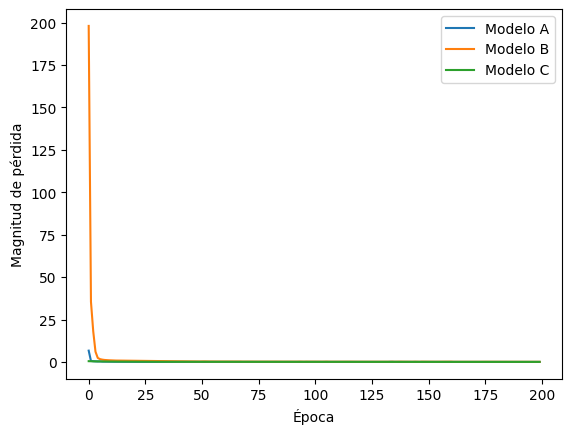

In [ ]:
# Entrenamos el modelo
# - Las epocas es cuantas vueltas da el modelo
# - El lote es cuantas muestras de Y usamos para entrenar el modelo cada vez
EPOCAS = 200
LOTE   = 64
print("Comenzando a entrenar...")

# Modelo A
print("    Modelo A...")
historialA = modeloA.fit(Xtrain, Ytrain, epochs = EPOCAS, batch_size = LOTE, verbose = False)

# Pintamos la función LOSS con respecto a las épocas
plt.xlabel("Época")
plt.ylabel("Magnitud de pérdida")
plt.plot(historialA.history["loss"], label='Modelo A')

# Modelo B
print("    Modelo B...")
historialB = modeloB.fit(Xtrain, Ytrain, epochs = EPOCAS, batch_size = LOTE, verbose = False)
plt.plot(historialB.history["loss"], label='Modelo B')

# Modelo C
print("    Modelo C...")
historialC = modeloC.fit(Xtrain, Ytrain, epochs = EPOCAS, batch_size = LOTE, verbose = False)
plt.plot(historialC.history["loss"], label='Modelo C')

# Cuando termine el entrenamiento comunicamos que está terminado
print("Entrenamiento concluido")

# Pintamos la leyenda para cada modelo y mostramos el gráfico
leg = plt.legend()
plt.show()

<a name="evaluacionmodelos"></a>
## Evaluación del modelo

Del gráfico anterior, podemos ver que la función de pérdida es peor en el modelo B que es el más simple. Pero todos convergen a un error próximo a cero al poco tiempo. Ahora tenemos que evaluar el modelo.

Vamos a ver la precisión y curva ROC para cada uno de los modelos. En esta parte usamos sólamente el conjunto de prueba.

Modelo A: 
0.009973512962460518
0.9971270561218262

Modelo B: 
0.06168587505817413
0.9946644902229309

Modelo C: 
0.026832638308405876
0.9948697090148926



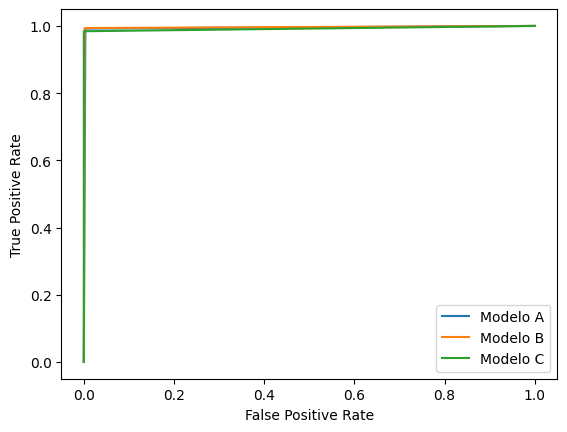

In [ ]:
# Evaluamos el modelo y mostramos LOSS y precisión
print("Modelo A: ")
print(historialA.history["loss"][EPOCAS-1])
print(historialA.history['accuracy'][EPOCAS-1])
print()
print("Modelo B: ")
print(historialB.history["loss"][EPOCAS-1])
print(historialB.history['accuracy'][EPOCAS-1])
print()
print("Modelo C: ")
print(historialC.history["loss"][EPOCAS-1])
print(historialC.history['accuracy'][EPOCAS-1])
print()

# Evaluamos el modelo mostrando las curvas ROC para cada uno
modeloA_prediccion = (modeloA.predict(Xtest,    verbose = False) > 0.5).astype(int)
modeloB_prediccion = (modeloB.predict(Xtest,    verbose = False) > 0.5).astype(int)
modeloC_prediccion = (modeloC.predict(Xtest,    verbose = False) > 0.5).astype(int)

fprA , tprA , thresholdsA = roc_curve(Ytest    , modeloA_prediccion)
fprB , tprB , thresholdsB = roc_curve(Ytest    , modeloB_prediccion)
fprC , tprC , thresholdsD = roc_curve(Ytest    , modeloC_prediccion)

# Pintamos el gráfico
plt.plot(fprA, tprA, label = 'Modelo A')
plt.plot(fprB, tprB, label = 'Modelo B')
plt.plot(fprC, tprC, label = 'Modelo C')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

leg = plt.legend()

plt.show()

<a name="importanciavariables"></a>
## Importancia de cada variable.

SHapley Additive exPlanations (SHAP) calcula los valores de Shapley, que es un concepto de la Teoría de Juegos Cooperativos, para explicar la contribución de cada uno de los característica de entrada a la predicción final del modelo. SHAP se puede utilizar en cualquier algoritmo de aprendizaje y es fácil de interpretar, pero requiere un gran número de muestras para capturar adecuadamente las interacciones de las variables lo que es computacionalmente costoso.

Como regla general, los modelos que son difíciles de interpretar, como las redes neuronales, son mejores prediciendo resultados. Y los modelos que son más fáciles de interpretar, como los random forests, tienden más al sobreajuste o son peores prediciendo el resultado final.

In [ ]:
# Declaramos la paciencia que vamos a tener con respesto al cálculo del SHAP.
#
# - 10 tarda unos pocos segundos y se debe usar para comprobaciones del código.
#
# - 200 es un tamaño de muestra decente, pero tarda unas 2 horas. Este es el
#   valor que se usa para la versión final de todos los gráficos y resultados.
TOTAL_SHAP_TESTS = 10

# Transforma los datos de dataframe a matriz para poder usarlos en las
# siguientes funciones
XtrainNumpy = Xtrain.to_numpy()
YtrainNumpy = Ytrain.to_numpy()
XtestNumpy  = Xtest.to_numpy()
YtestNumpy  = Ytest.to_numpy()

# Usar este algorithmo con muchas muestras tarda mucho tiempo
# Aquí pruebo a reducirlo un poco para probar los resultados iniciales

# ---- Primero, decir cuantas veces se van a ejecutar el test. En este caso 200.
mySamples   = shap.sample(XtestNumpy, TOTAL_SHAP_TESTS)

# ---- Se hacen las predicciones.
explainer    = shap.KernelExplainer(modeloA.predict,mySamples)
shap_values2 = explainer(mySamples)

1/1 [==============================] - 0s 199ms/step


  0%|          | 0/10 [00:00<?, ?it/s]

672/672 [==============================] - 1s 2ms/step


In [ ]:
print(modeloA.predict)

<bound method Model.predict of <keras.src.engine.sequential.Sequential object at 0x7af7ca185ed0>>


In [ ]:
# Creamos varios vectores donde almacenamos los valores SHAP, esto sirve para
# poder guardar luego los resultados y no tener que esperar otras 2h si queremos
# generar gráficos relacionados con los valores SHAP.

vectorSHAP_valores = shap_values2.values
vectorSHAP_base    = shap_values2.base_values
vectorSHAP_data    = shap_values2.data

# Guardamos también varios valores de medias y desviaciones típicas que usaremos
# en el mapa de calor final.

vectorMedias    = np.mean(shap_values2.values,              axis=0)
vectorAbsMedias = np.mean(np.absolute(shap_values2.values), axis=0)
vectorSigmas    = np.std( shap_values2.values,              axis=0)
vectorAbsSigmas = np.std( np.absolute(shap_values2.values), axis=0)


Hay varias formas de visualizar los valores SHAP. Por ejemplo, podemos hacer un gráfico de barras con los valores absolutos medios de cada variable y ver cuales tienen más impacto en el modelo.

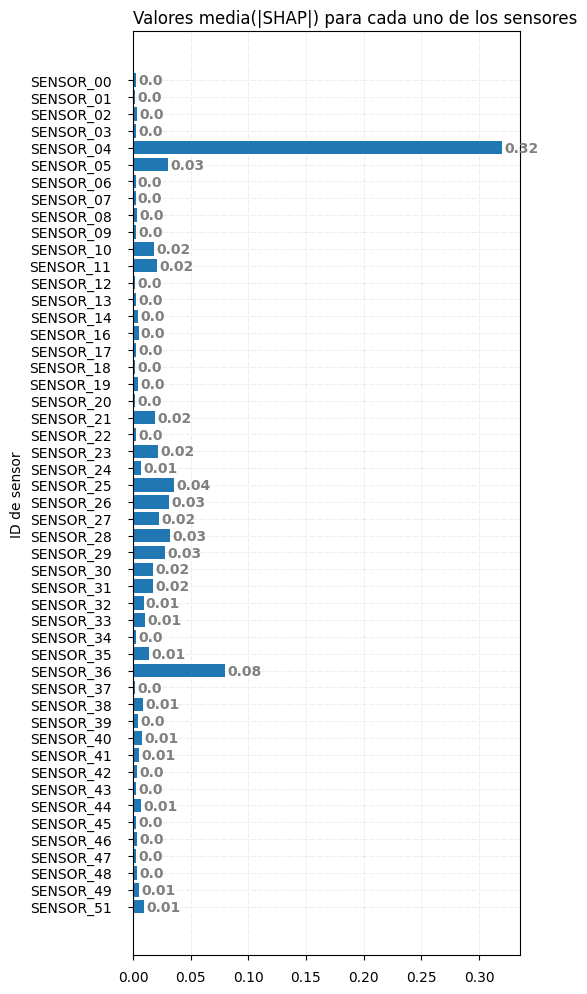

In [ ]:
# Mostrar el gráfico

# Este comando es lo mismo, pero sólo muestra los 20 primeros, para mantener consistencia muestro los 50 sensores.
# shap.summary_plot( shap_values , mySamples, feature_names = list(Xtrain.columns) )

variablesNames = list(Xtrain.columns)
currentPlotTitle = 'Valores media(|SHAP|) para cada uno de los sensores'

# Create the plot dataframe

#barplotData = np.zeros((200, 50))
barplotData = pd.DataFrame( np.zeros([len(sensorNames),2]) , columns = ['name', 'value'] )
barplotData.iloc[:,0] = sensorNames
barplotData.iloc[:,1] = vectorAbsMedias

# Figure Size
fig, ax = plt.subplots(figsize=(5, 12))

# Horizontal Bar Plot
plt.barh(barplotData.iloc[:,0],  barplotData.iloc[:,1])

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=7)
ax.yaxis.set_tick_params(pad=12)

ax.grid(color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Show first values on top
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:

  currentOffset = 0.002
  currentW = i.get_width()
  if(currentW < 0): currentOffset = -0.005

  plt.text(i.get_width() + currentOffset, i.get_y() + 0.65,
           str(round((i.get_width()), 2)),
           fontsize=10, fontweight='bold',
           color='grey')


# Add Plot Title
ax.set_title(currentPlotTitle,loc='left', )
ax.set_ylabel("ID de sensor")

# Show Plot
plt.show()

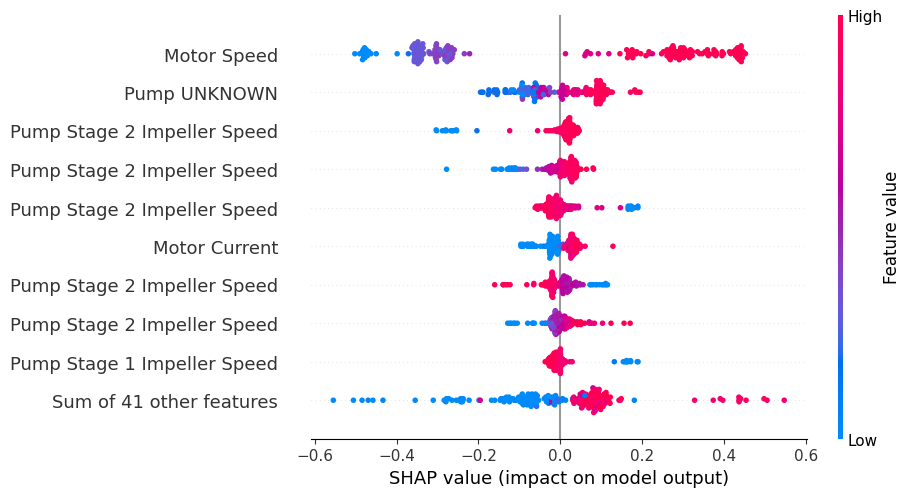

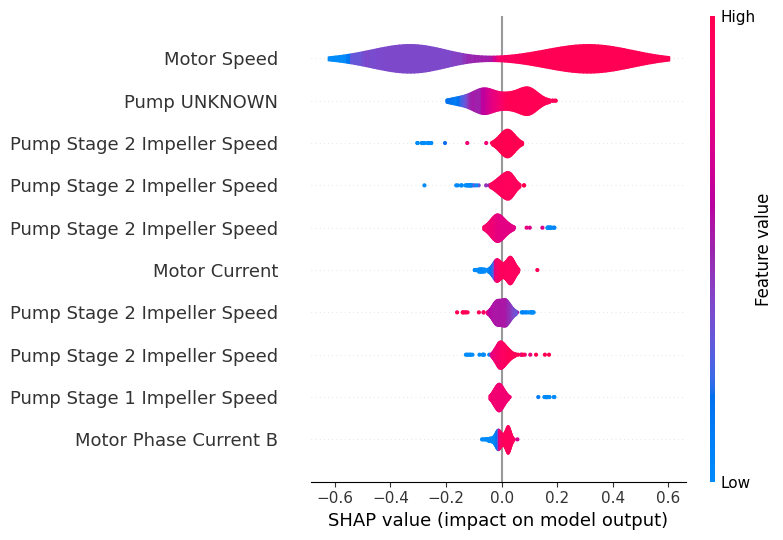

In [ ]:
# Para poder hacer el beeswarm hay que hacer unas transformaciones un poco raras
# primero. Aquí simplemente convierto un objecto explanation del SHAP a otro
# objeto.
explanationANN = shap.Explanation(
    values        = vectorSHAP_valores.squeeze(),
    base_values   = vectorSHAP_base,
    data          = vectorSHAP_data,
    feature_names = sensorProperties
)

# Plots del beeswarm y violin
shap.plots.beeswarm(explanationANN)
shap.summary_plot(explanationANN, plot_type='violin', max_display=10)

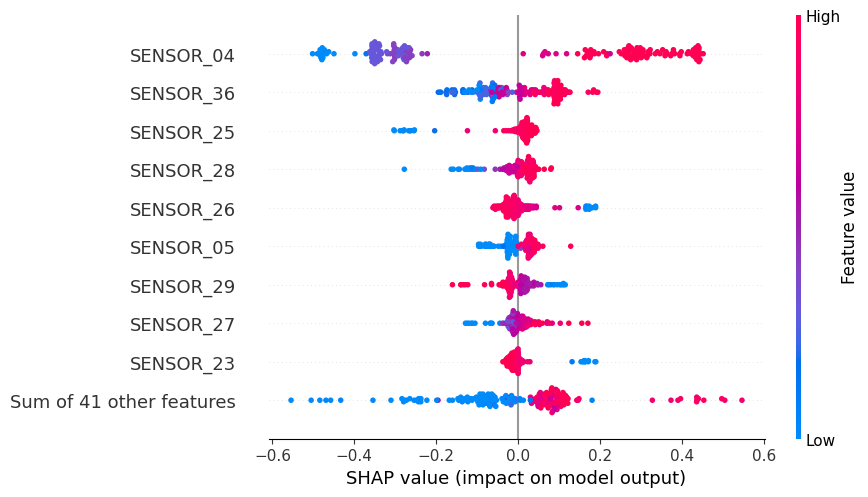

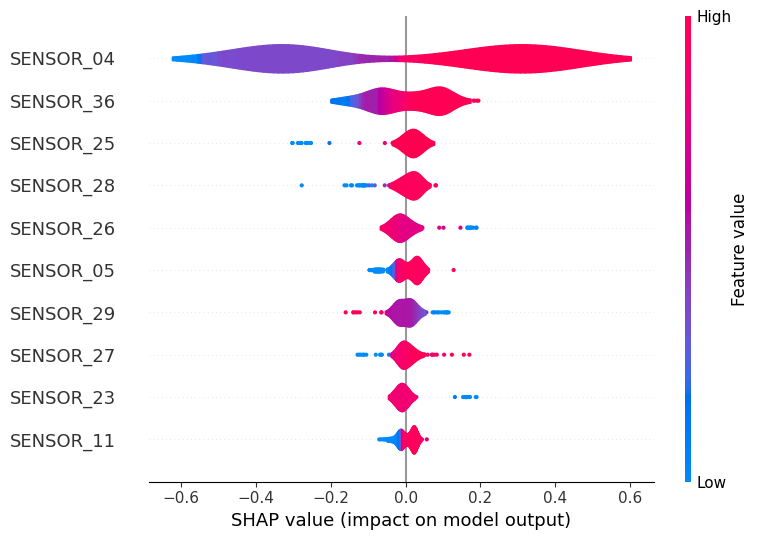

In [ ]:
# Mismo gráfico con ID de sensor en lugar de función
explanationANN = shap.Explanation(
    values        = vectorSHAP_valores.squeeze(),
    base_values   = vectorSHAP_base,
    data          = vectorSHAP_data,
    feature_names=sensorNames
)

# Plots del beeswarm y violin
shap.plots.beeswarm(explanationANN)
shap.summary_plot(explanationANN, plot_type='violin', max_display=10)

Gráficos de dependencias parciales para cada variable

In [ ]:
# Hay que ponerle nombre a las esperanzas de cada variable.
# Es un poco lío porque no lo hace de forma automática, pero con esto
# se arregla.
XtestNumpy2 = pd.DataFrame(XtestNumpy, columns=sensorNames)

# Para cada sensor
for k in range( len(sensorProperties) ):

    # Elegimos el texto para el título y los ejes
    currentVariableName = sensorProperties[k]
    currentTitle = "Modelo A: " + currentVariableName
    #currentXaxis = sensorNames[k]
    #currentYaxis = "E(f(x) | " + currentXaxis + ")"

    # Hacemos el gráfico
    shap.partial_dependence_plot(k, modeloA.predict, XtestNumpy2,
                                 ice=False, model_expected_value=True,
                                 feature_expected_value=True, show=False)

    # Cambiamos el título y los ejes
    plt.title(currentTitle, y=1.1)

    # Mostramos el gráfico
    plt.show()

<a name="guardar"></a>

## Guardado de resultados

En esta sección guardamos todos los resultados y logs en la carpeta de Resultados/ANN del drive.

In [ ]:
# ------------------------------------------------------------------------------
# Valores medios absolutos y similares
# ------------------------------------------------------------------------------


# Nombre del fichero y directorio donde se guarda
ANN_SHAPS = 'ANN_SHAPS.csv'
BASE_FOLDER = PROJECT_FOLDER + 'Resultados/ANN/'

# Se convierten los resultados a un dataframe
ANN_SHAPS_DF = pd.DataFrame({'Means':    np.squeeze(vectorMedias),
                             'AbsMeans': np.squeeze(vectorAbsMedias),
                             'Sigma':    np.squeeze(vectorSigmas),
                             'AbsSigma': np.squeeze(vectorAbsSigmas)})


# Guardar el resultado para que luego se pueda hacer el heatmap
ANN_SHAPS_DF.to_csv( BASE_FOLDER + ANN_SHAPS, index=False)

# ------------------------------------------------------------------------------
# Valores del Explainer
# ------------------------------------------------------------------------------

# Guardamos los valores del objecto Explainer por si queremos modificar los
# gráficos luego o hacer otra cosa sin tener que esperar 2h a que se vuelvan
# a calcular
ANN_EXPLANATION_VALUES      = 'explanationValues.txt'
ANN_EXPLANATION_BASE_VALUES = 'explanationBase.txt'
ANN_EXPLANATION_DATA        = 'explanationData.txt'
ANN_EXPLANATION_FEATURES    = 'explanationFeatures.txt'

BASE_FOLDER = PROJECT_FOLDER + 'Resultados/Datos completos de SHAP/ANN/'

np.savetxt(BASE_FOLDER + ANN_EXPLANATION_VALUES,      vectorSHAP_valores.squeeze())
np.savetxt(BASE_FOLDER + ANN_EXPLANATION_BASE_VALUES, vectorSHAP_base)
np.savetxt(BASE_FOLDER + ANN_EXPLANATION_DATA,        vectorSHAP_data)
np.savetxt(BASE_FOLDER + ANN_EXPLANATION_FEATURES,    sensorNames,     fmt='%s')

# ------------------------------------------------------------------------------
# Modelo ANN
# ------------------------------------------------------------------------------
BASE_FOLDER  = PROJECT_FOLDER + 'Resultados/ANN/'
MODEL_FOLDER = BASE_FOLDER + 'Modelo/'
MODEL_NAME   = 'modelA'

modeloA.save(MODEL_FOLDER + MODEL_NAME)